In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('../Data/01_raw/attrition_train.csv', low_memory = False)
pd.set_option("display.max_columns", None)

In [4]:
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,38,No,Travel_Frequently,240,Research & Development,2,4,Life Sciences,1,803,1,Female,75,4,2,Manufacturing Director,1,Single,5980,26085,6,Y,Yes,12,3,4,80,0,17,2,3,15,7,4,12
1,52,No,Travel_Frequently,322,Research & Development,28,2,Medical,1,1401,4,Female,59,4,4,Manufacturing Director,3,Married,13247,9731,2,Y,Yes,11,3,2,80,1,24,3,2,5,3,0,2
2,28,No,Non-Travel,1476,Research & Development,1,3,Life Sciences,1,1315,3,Female,55,1,2,Laboratory Technician,4,Married,6674,16392,0,Y,No,11,3,1,80,3,10,6,3,9,8,7,5
3,43,No,Travel_Rarely,920,Research & Development,3,3,Life Sciences,1,1255,3,Male,96,1,5,Research Director,4,Married,19740,18625,3,Y,No,14,3,2,80,1,25,2,3,8,7,0,7
4,27,No,Non-Travel,443,Research & Development,3,3,Medical,1,850,4,Male,50,3,1,Research Scientist,4,Married,1706,16571,1,Y,No,11,3,3,80,3,0,6,2,0,0,0,0


## 1. Définition des données  
- Age : âge des employés  
- Attrition : l'employé a quitté ou non la société  
- BusinessTravel : fréquence des voyages d'affaires
- DailyRate : salaire journalier  
- Department : service dans lequel travaille l'employé
- DistanceFromHome : distance entre le lieu de travai la maison  
- Education : niveau de diplôme de la personne  
- EMployeeNumber : numéro de l'employé  
- EnvironmentSatisfaction : niveau de satisfaction pour le cadre de travail  
- HourlyRate : salaire horaire  
- JobInvolvement : niveau d'implication au travail  
- JobLevel : niveau hiérarchique de la personne  
- MaritalStatus : situation maritale de l'employé
- JobSatisfaction : niveau de satisfaction de la personne pour son poste  
- MonthlyIncome : salaire mensuel perçu par l'employé
- MonthlyRate : 
- NumCompaniesWorked : nombre de sociétés dans lequel la personne travail
- Over18 : l'employé est majeur
- OverTime : heures supplémentaires effectuées ou non
- PercentSalaryHike : % d'augmentation du salaire par rapport à l'ancien salaire
- PerformanceRating : évaluation du niveau de performance d'un employé  
- RelationshipSatisfaction : niveau de satisfaction de l'employé sur ses relation au travail
- StandardHours : Nombre d'heures de travail effectuées sur la semaine  
- StockOptionLevel : niveau de prise de participation aux actions de l'entreprise  
- TotalWorkingYears : années d'expérience professionnel  
- TrainingTimesLastYear : durée moyenne de formation en jour l'année précédente  
- WorkLifeBalance : équilibre entre le temps de travail et le temps domestique
- YearsAtCompany : nombre d'années dans la société
- YearsInCurrentRole : nombre d'années passées dans le poste actuel  
- YearsSinceLastPromotion : nombre d'années depuis la dernière promotion du salarié  
- YearsWithCurrManager : nombre d'années passées avec le même manager

## 2. Checklist

### 1. Analyse de forme
- **Variable target** : attrition score  
- **Lignes et colonnes** : 1100 lignes et 35 colonnes
- **Types de variables** : 26 variables quantitatives, 9 variables qualitatives  
- **Analyse des valeurs manquantes** : aucune valeur manquante

### 2. Analyse de fond
- **Visualisation de la target** : 83.8% no, 16.2% yes  
- **Signification des variables** :

### 1. Analyse de forme

In [5]:
df.shape

(1100, 35)

In [6]:
df.dtypes.value_counts()

int64     26
object     9
dtype: int64

In [7]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.0,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.0,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,36.854545,804.234545,9.301818,2.907273,1.0,1026.404545,2.730909,66.011818,2.707273,2.064545,2.737273,6536.102727,14221.912727,2.733636,15.219091,3.155455,2.697273,80.0,0.785455,11.206364,2.780909,2.780909,7.070000,4.250000,2.186364,4.199091
std,9.039229,405.583238,8.093392,1.012453,0.0,598.712521,1.083564,20.374359,0.731298,1.115862,1.107125,4729.940355,7095.123330,2.533660,3.699863,0.362502,1.084338,0.0,0.848575,7.784761,1.309377,0.706269,6.147387,3.595094,3.234650,3.584848
min,18.000000,102.000000,1.000000,1.000000,1.0,4.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1051.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,460.500000,2.000000,2.000000,1.0,494.750000,2.000000,48.000000,2.000000,1.000000,2.000000,2906.500000,8049.750000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,805.000000,7.000000,3.000000,1.0,1031.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4938.500000,14022.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,9.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,42.250000,1162.000000,14.000000,4.000000,1.0,1543.250000,4.000000,84.000000,3.000000,3.000000,4.000000,8516.000000,20344.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1498.000000,29.000000,5.000000,1.0,2065.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26997.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


## 2. Vérification des corrélations éventuelles

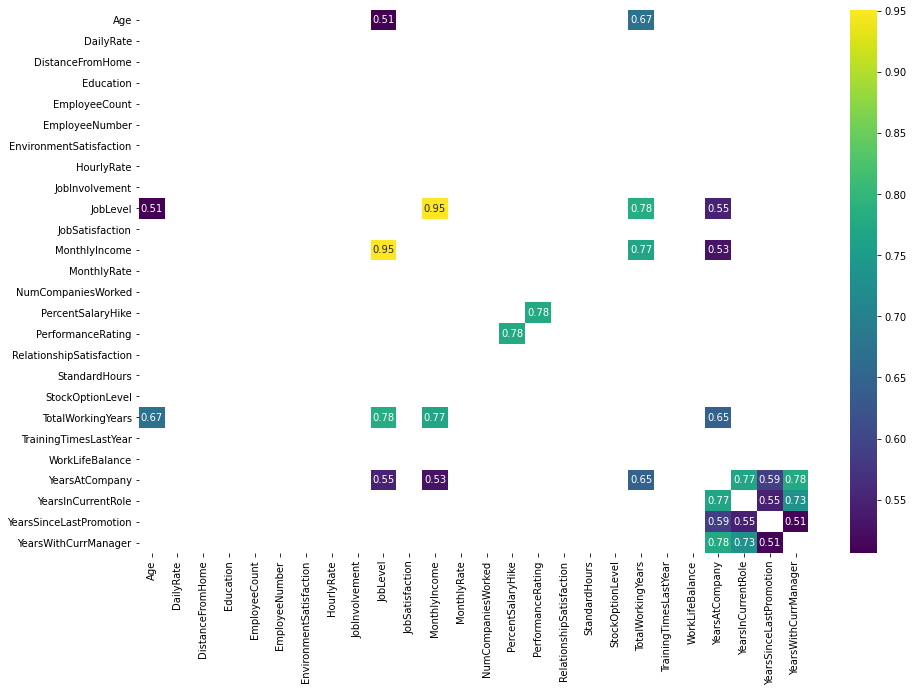

In [8]:
dfCorr = df.corr()
filteredDf = dfCorr[((dfCorr >= .5) | (dfCorr <= -.5)) & (dfCorr !=1.000)]
plt.figure(figsize=(15,10))
sns.heatmap(filteredDf, annot=True, cmap="viridis")
plt.show()

In [9]:
# target variable visualization
df['Attrition'].value_counts(normalize = True)

No     0.838182
Yes    0.161818
Name: Attrition, dtype: float64

### 1. Création de sous-ensembles

In [10]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [11]:
# creation of negative and postive subsets
positive_df = df[df['Attrition'] == 'Yes']
negative_df = df[df['Attrition'] == 'No']

In [12]:
numerical_cols = df.select_dtypes(include='int64').columns

In [13]:
categorical_cols = df.select_dtypes(include='object').columns

In [14]:
# # creation of experience/education subset
# experience_columns = df[['Education', 'JobLevel', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Age']]

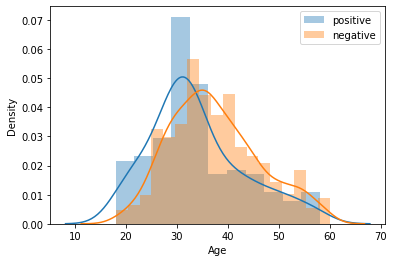

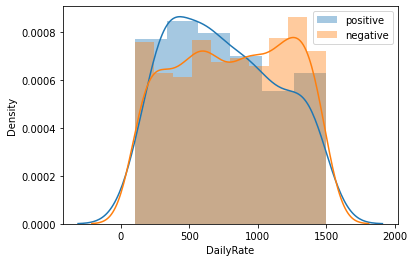

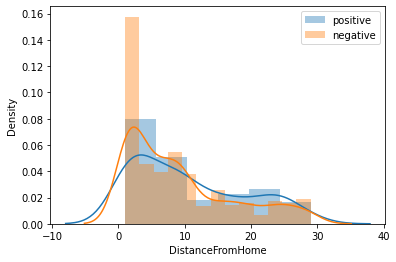

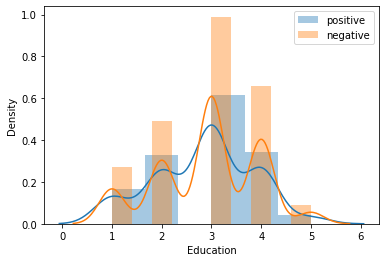

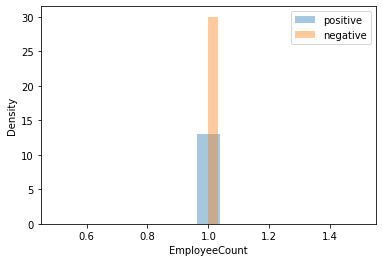

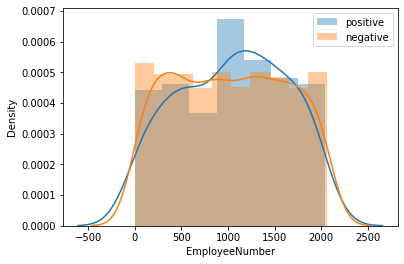

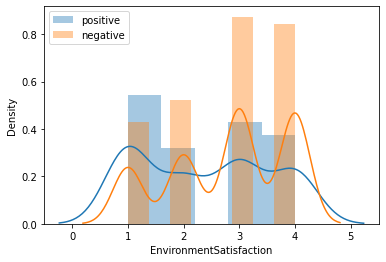

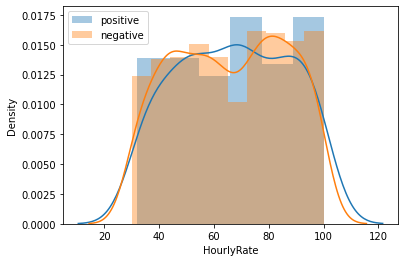

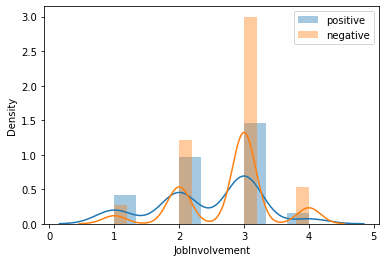

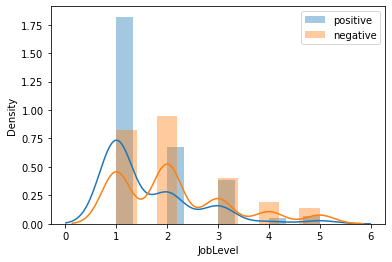

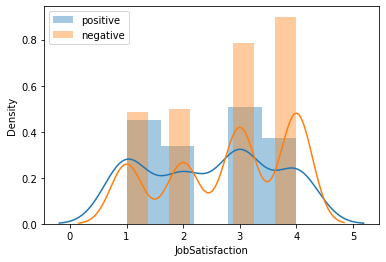

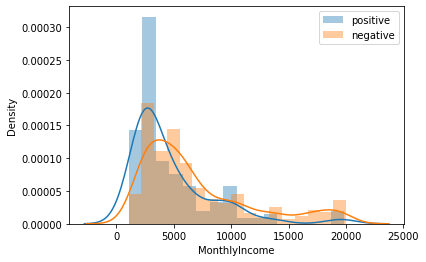

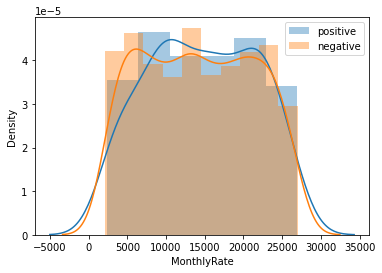

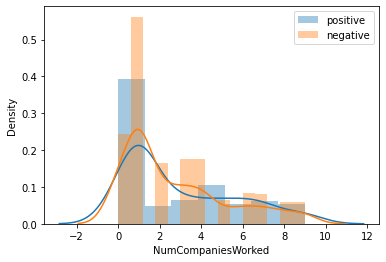

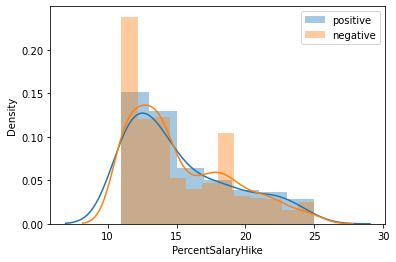

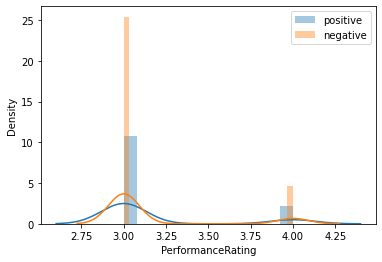

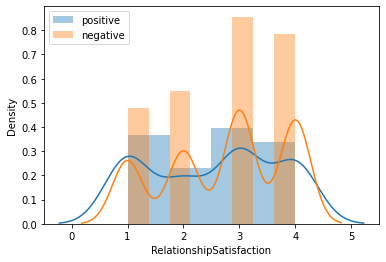

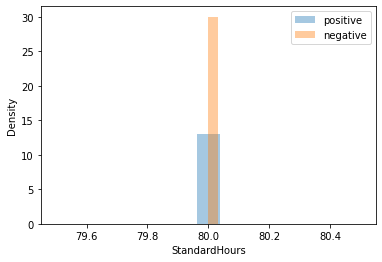

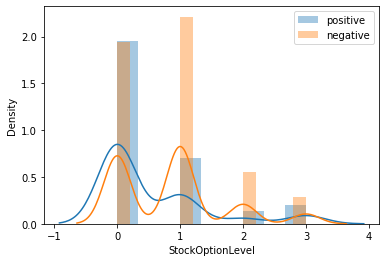

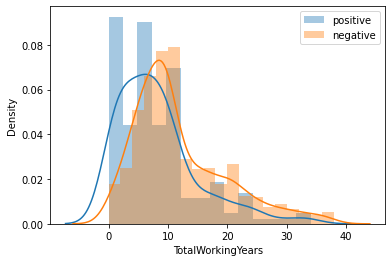

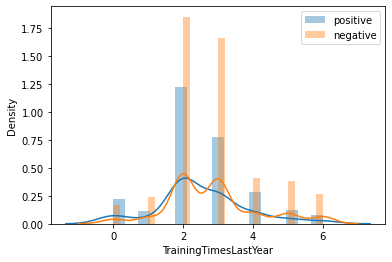

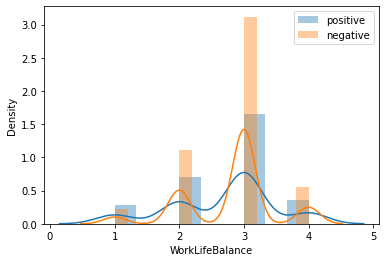

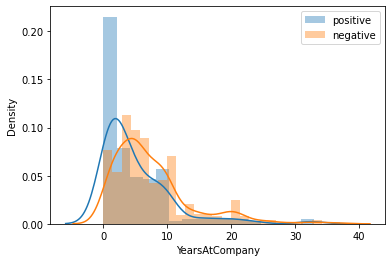

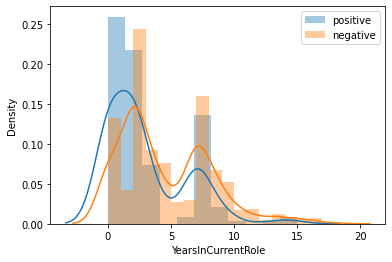

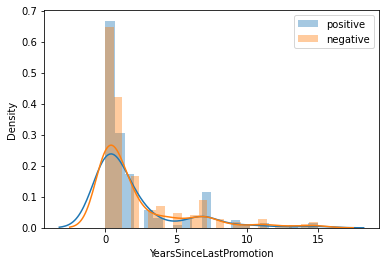

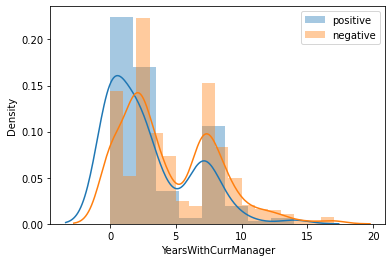

In [15]:
for col in numerical_cols:
    plt.figure()
    sns.distplot(positive_df[col], label='positive')
    sns.distplot(negative_df[col], label='negative')
    plt.legend()

**Remarques** :  
- Les revenus semblent ne pas apporter d'explications significatives dans le départ ou non d'un salarié  
- On remarque toutefois que les employés ayant quitté l'entreprise sont moins bien payées globalement et les droits sur les stocks options sont moins importants

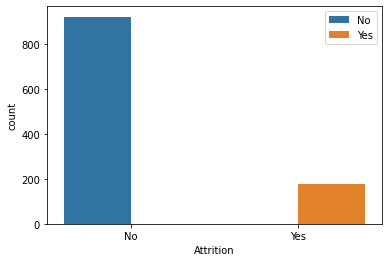

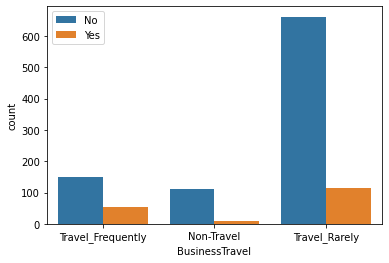

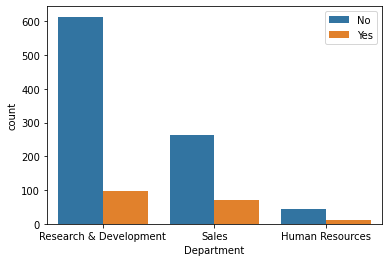

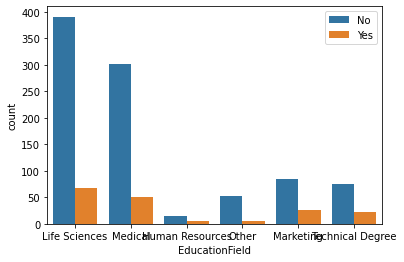

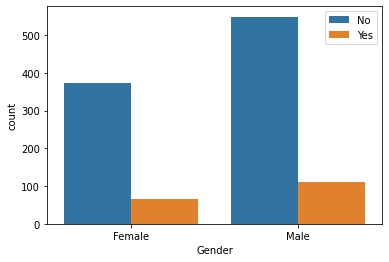

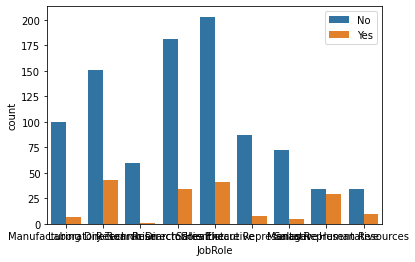

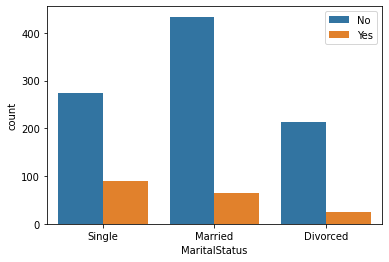

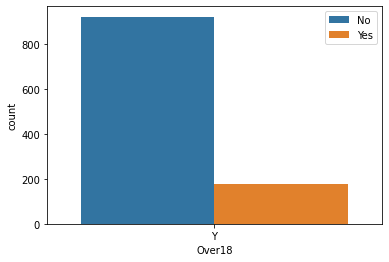

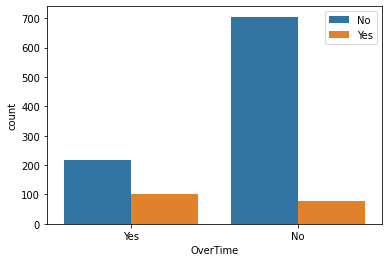

In [23]:
for col in categorical_cols:
    plt.figure(figsize=(20,10))
    sns.countplot(x = col, hue='Attrition', data=df)
    plt.legend()

**Remarques** :  
- Les personnes ayant quitté l'entreprise semblent moins satisfaites de leur environnement de travail  
- De la même manière, la qualité des relations avec leur collègues est moindre par rapport aux peronnes n'ayant pas quitté l'entreprise  
- Enfin, elles trouvent également moins d'intérêt dans leur travail que les autres

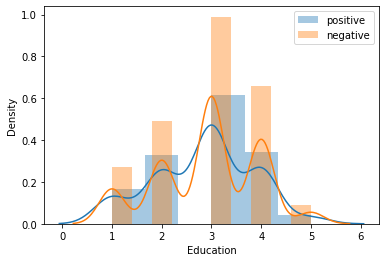

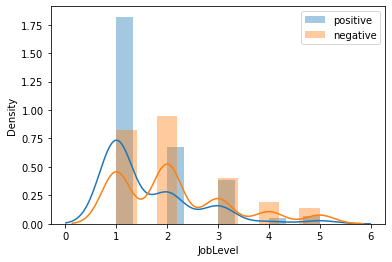

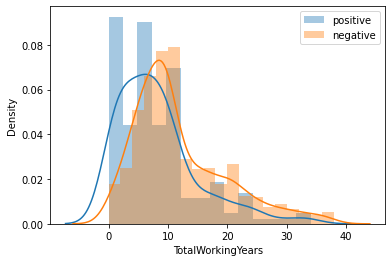

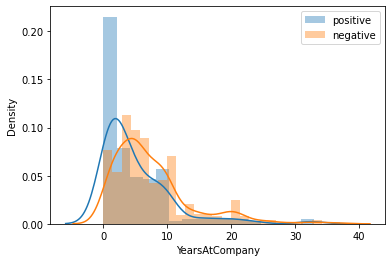

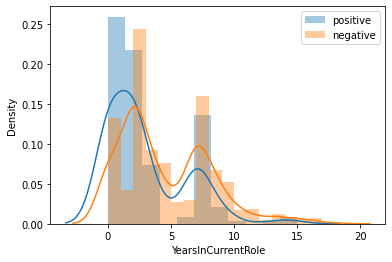

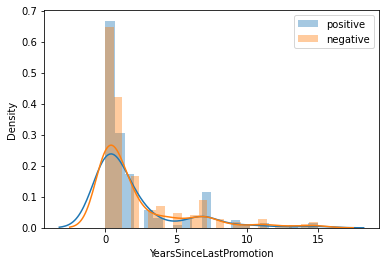

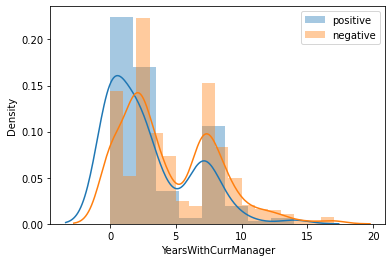

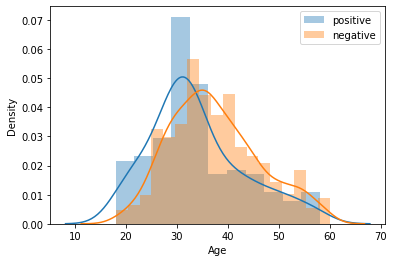

In [34]:
for col in experience_columns:
    plt.figure()
    sns.distplot(df[col], hue = 'Attrition', data = df)
    plt.legend()

**Remarques** :
- Les employés qui quittent l'entreprise sont généralement en bas de la hiérarchie
- Ils possèdent également moins d'expérience professionnelle que ceux qui sont toujours employés dans l'entreprise